# Medical Data Analysis by plotting a Categorical plot and a heatmap

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/medical_examination.csv')

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1.0,0.0,0.0,1.0,0.0
1,1,20228,1,156,85.0,140,90,3,1.0,0.0,0.0,1.0,1.0
2,2,18857,1,165,64.0,130,70,3,1.0,0.0,0.0,0.0,1.0
3,3,17623,2,169,82.0,150,100,1,1.0,0.0,0.0,1.0,1.0
4,4,17474,1,156,56.0,100,60,1,1.0,0.0,0.0,0.0,0.0


## Creating a new column called  "Overweight" by calculating BMI first [BMI = Weight/height s^2] .If the Calucated value is greater than 25 then the person is overweight which will be denoted by 1

In [4]:
df['Overweight'] = (df['weight'] / (df['height'] / 100)**2).apply(lambda x : 1 if x>25 else 0)

In [5]:
df['cholesterol']= df['cholesterol'].apply(lambda x : 0 if x == 1 else 1)

In [6]:
df['gluc']= df['gluc'].apply(lambda x : 0 if x == 1 else 1)

In [7]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
0,0,18393,2,168,62.0,110,80,0,0,0.0,0.0,1.0,0.0,0
1,1,20228,1,156,85.0,140,90,1,0,0.0,0.0,1.0,1.0,1
2,2,18857,1,165,64.0,130,70,1,0,0.0,0.0,0.0,1.0,0
3,3,17623,2,169,82.0,150,100,0,0,0.0,0.0,1.0,1.0,1
4,4,17474,1,156,56.0,100,60,0,0,0.0,0.0,0.0,0.0,0


Creating new Dataframe for categorical plot

In [8]:
df_cat = pd.melt(df , id_vars =['cardio'],
                 value_vars= ['cholesterol','gluc','alco','active','smoke','Overweight'],
                 var_name='variable',
                 value_name= 'value')

In [9]:
df_cat.head()

,cardio,variable,value
0,0.0,cholesterol,0.0
1,1.0,cholesterol,1.0
2,1.0,cholesterol,1.0
3,1.0,cholesterol,0.0
4,0.0,cholesterol,0.0


Reformatting the data to split it by cardio

In [10]:
df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')

In [11]:
df_cat

,cardio,variable,value,total
0,0.0,Overweight,0.0,5757
1,0.0,Overweight,1.0,6869
2,0.0,active,0.0,2266
3,0.0,active,1.0,10360
4,0.0,alco,0.0,11933
5,0.0,alco,1.0,693
6,0.0,cholesterol,0.0,10617
7,0.0,cholesterol,1.0,2009
8,0.0,gluc,0.0,11127
9,0.0,gluc,1.0,1499


Plotting the Categorical plot

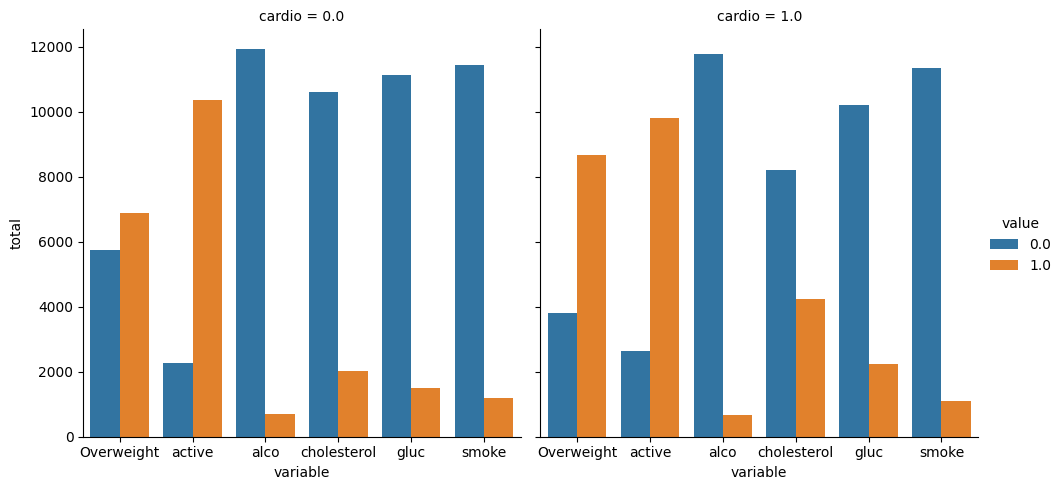

In [12]:
fig = sns.catplot(x='variable', y='total',hue ='value', data=df_cat, col = 'cardio' ,kind='bar')

In [13]:
fig.savefig('catplot.png')

## Heatmap

making new dataframe




In [17]:
df_heat = df[((df['ap_lo'] <= df['ap_hi']) &
                  (df['height'] >= df['height'].quantile(0.025))&
                  (df['height'] <= df['height'].quantile(0.975))&
                  (df['weight'] >= df['weight'].quantile(0.025))&
                  (df['weight'] <= df['weight'].quantile(0.975)))]

In [18]:
df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
0,0,18393,2,168,62.0,110,80,0,0,0.0,0.0,1.0,0.0,0
1,1,20228,1,156,85.0,140,90,1,0,0.0,0.0,1.0,1.0,1
2,2,18857,1,165,64.0,130,70,1,0,0.0,0.0,0.0,1.0,0
3,3,17623,2,169,82.0,150,100,0,0,0.0,0.0,1.0,1.0,1
4,4,17474,1,156,56.0,100,60,0,0,0.0,0.0,0.0,0.0,0


In [19]:
corr = df_heat.corr()

Creating a mask for Heatmap which hides the upper triangle of the matrix as the correlation matrix is mirrored


In [20]:
mask = np.triu(np.ones_like(corr, dtype=bool))

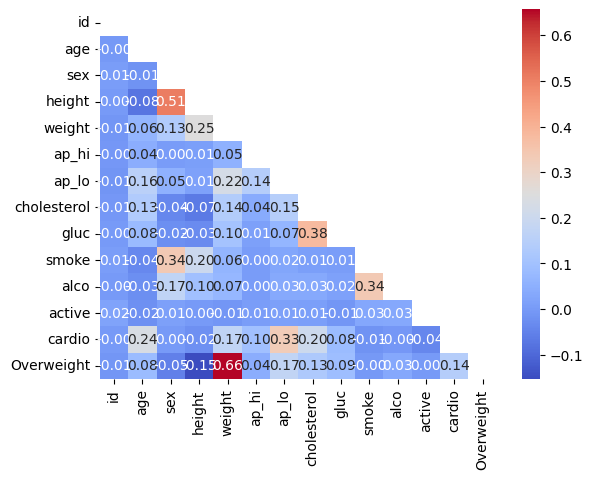

In [47]:
fig =sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",mask=mask )

In [49]:
plt.savefig('heatmap')

<Figure size 640x480 with 0 Axes>